# Exploración aquí:

In [44]:
# - Importación de librerías:

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# - Importación del set de datos:

url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

# - Guardado:

rutg = '../data/raw/dataset.csv'

# - Lectura:

df = pd.read_csv(url, delimiter=';')
df.to_csv(rutg, index=False)
print("El archivo fue guardado en la ruta:", rutg)

# - Vista previa:

df

El archivo fue guardado en la ruta: ../data/raw/dataset.csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [46]:
df.drop(['day_of_week', 'duration', 'pdays', 'previous'], axis = 1, inplace = True)
df = df[~df[['housing', 'loan', 'marital', 'job', 'education']].isin(['unknown']).any(axis=1)]
df

,age,job,marital,education,default,housing,loan,contact,month,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


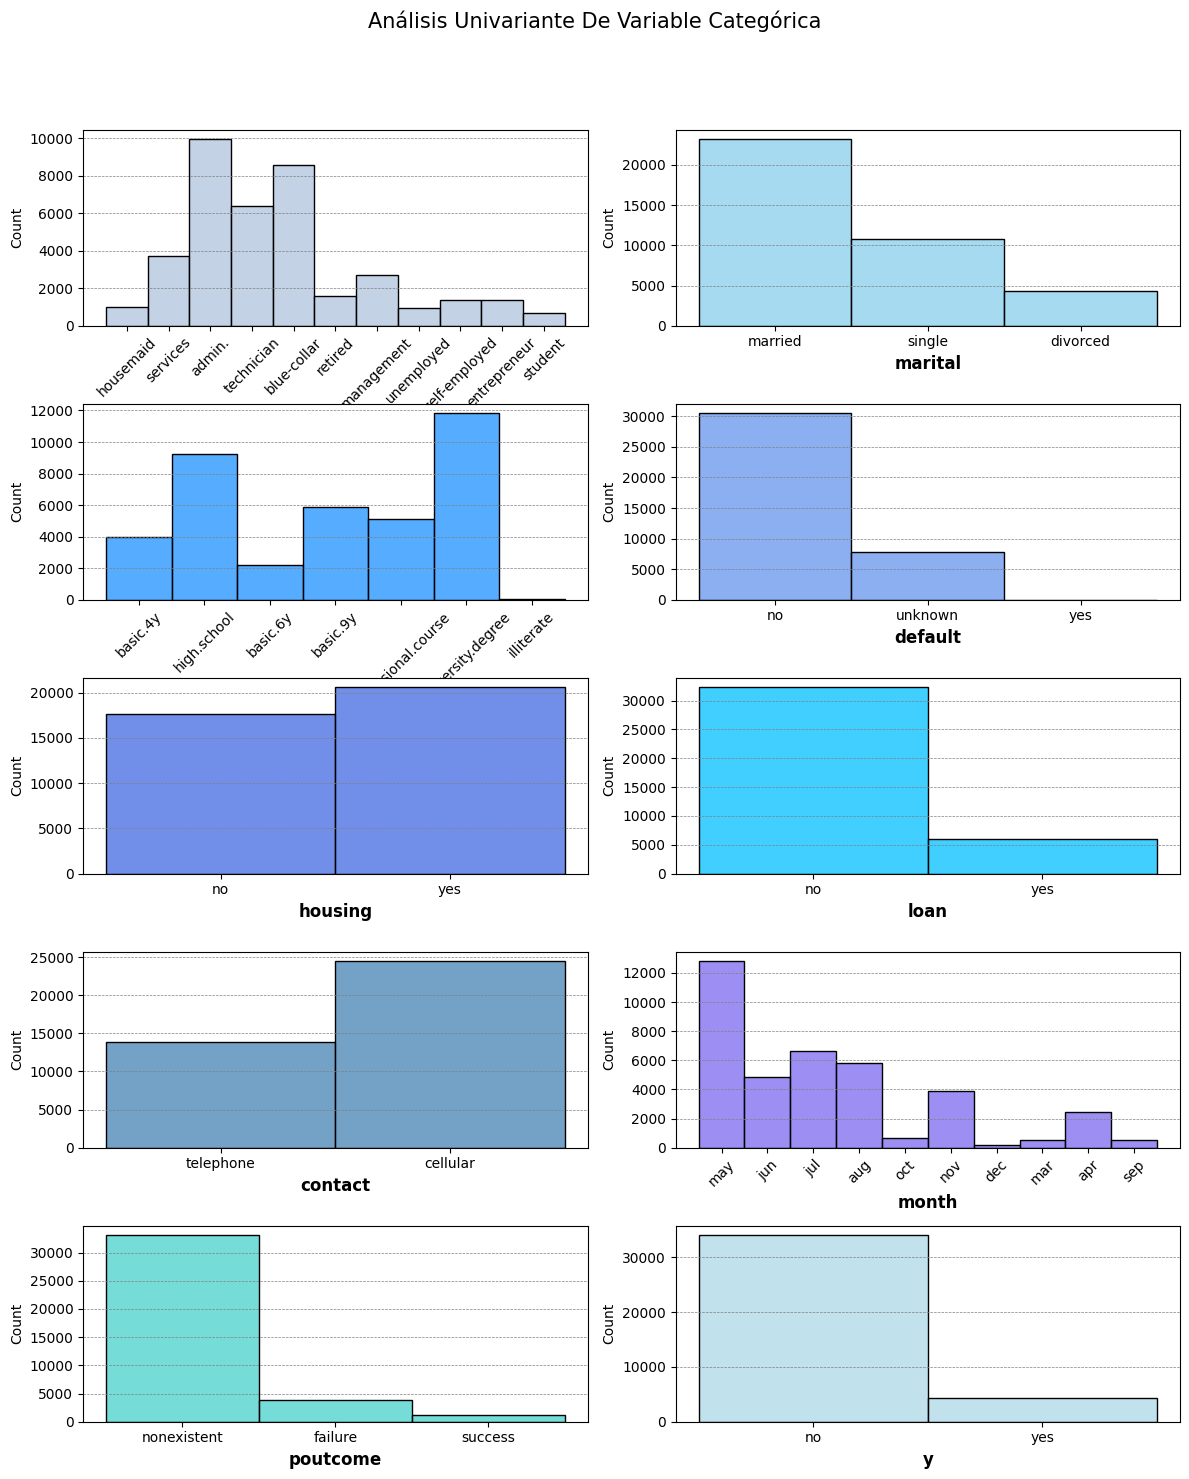

In [47]:
# - Parámetros:

fig, axis = plt.subplots(5, 2, figsize=(12, 15))

# - Título:

fig.suptitle("Análisis Univariante De Variable Categórica", fontsize=15)

# - Distribución:

sns.histplot(ax=axis[0, 0], data=df, x='job', color='lightsteelblue')
sns.histplot(ax=axis[0, 1], data=df, x='marital', color='skyblue')
sns.histplot(ax=axis[1, 0], data=df, x='education', color='dodgerblue')
sns.histplot(ax=axis[1, 1], data=df, x='default', color='cornflowerblue')
sns.histplot(ax=axis[2, 0], data=df, x='housing', color='royalblue')
sns.histplot(ax=axis[2, 1], data=df, x='loan', color='deepskyblue')
sns.histplot(ax=axis[3, 0], data=df, x='contact', color='steelblue')
sns.histplot(ax=axis[3, 1], data=df, x='month', color='mediumslateblue')
sns.histplot(ax=axis[4, 0], data=df, x='poutcome', color='mediumturquoise')
sns.histplot(ax=axis[4, 1], data=df, x='y', color='lightblue')

# - Visualización:

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4)
for ax in axis.flat:
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
for ax in axis.flat:
    x_labels = ax.get_xticklabels()
    if len(x_labels) > 3:
        for label in x_labels:
            label.set_rotation(45)
for ax in axis.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')

plt.show()

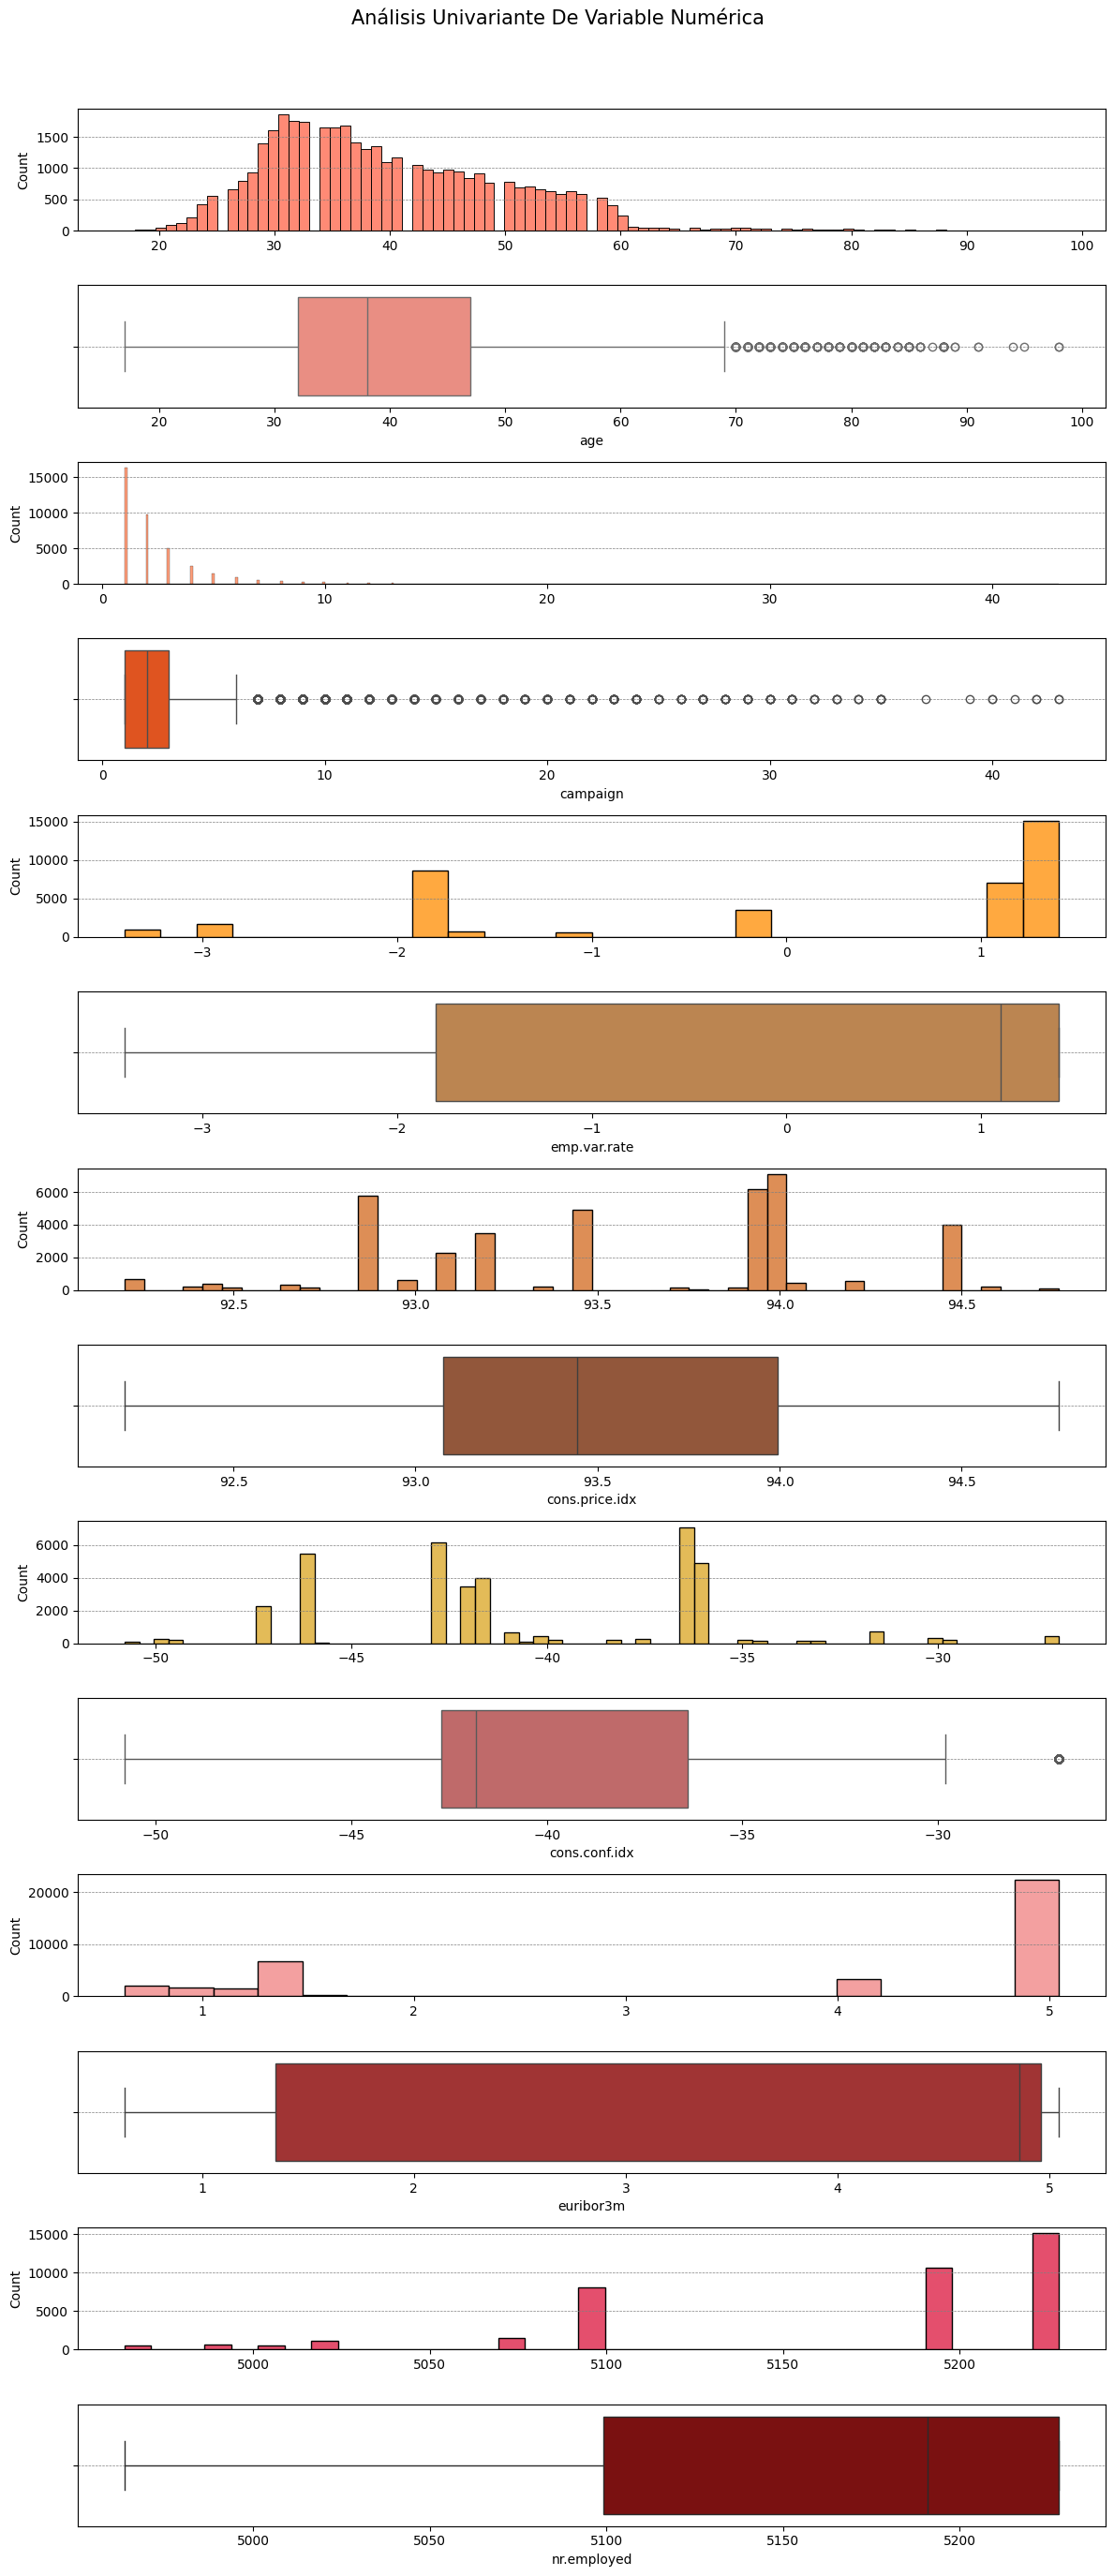

In [48]:
# - Parámetros:

fig, axis = plt.subplots(14, 1, figsize=(12, 28))
fig.suptitle("Análisis Univariante De Variable Numérica", fontsize=15)

# - Lista De Variables:

variables = [
    ("age", "tomato", "salmon"),
    ("campaign", "coral", "orangered"),
    ("emp.var.rate", "darkorange", "peru"),
    ("cons.price.idx", "chocolate", "sienna"),
    ("cons.conf.idx", "goldenrod", "indianred"),
    ("euribor3m", "lightcoral", "firebrick"),
    ("nr.employed", "crimson", "darkred"),
]

# - Gráficos:

for i, (var, hist_color, box_color) in enumerate(variables):
    sns.histplot(ax=axis[2*i], data=df, x=var, color=hist_color).set(xlabel=None)
    sns.boxplot(ax=axis[2*i + 1], data=df, x=var, color=box_color)

# - Visualización:

plt.tight_layout(rect=[0, 0, 1, 0.96])
for ax in axis.flat:
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.show()

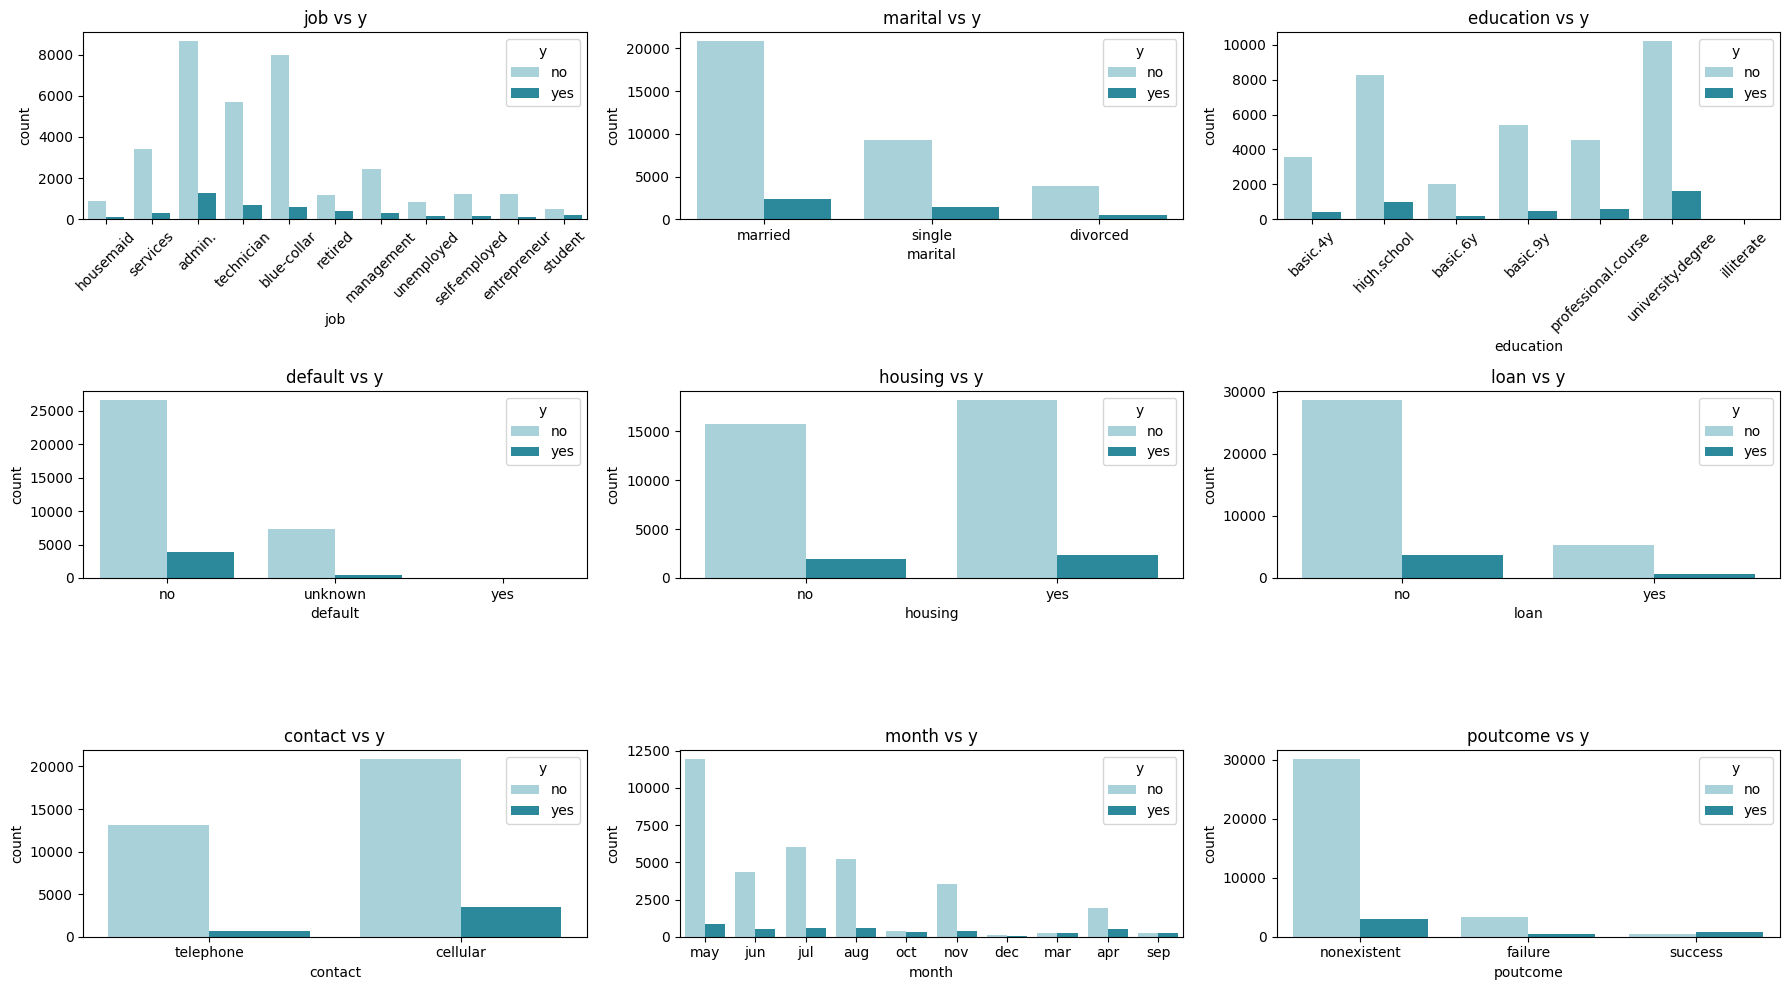

In [ ]:
# - Parámetros:

fig, axis = plt.subplots(3, 3, figsize=(18, 10))
palette = ["#a1d6e2", "#1995ad"]

# - Distribución:

sns.countplot(ax=axis[0, 0], data=df, x="job", hue="y", palette=palette)
axis[0, 0].set_title("job vs y")
axis[0, 0].tick_params(axis='x', rotation=45)
sns.countplot(ax=axis[0, 1], data=df, x="marital", hue="y", palette=palette)
axis[0, 1].set_title("marital vs y")
sns.countplot(ax=axis[0, 2], data=df, x="education", hue="y", palette=palette)
axis[0, 2].set_title("education vs y")
axis[0, 2].tick_params(axis='x', rotation=45)
sns.countplot(ax=axis[1, 0], data=df, x="default", hue="y", palette=palette)
axis[1, 0].set_title("default vs y")
sns.countplot(ax=axis[1, 1], data=df, x="housing", hue="y", palette=palette)
axis[1, 1].set_title("housing vs y")
sns.countplot(ax=axis[1, 2], data=df, x="loan", hue="y", palette=palette)
axis[1, 2].set_title("loan vs y")
sns.countplot(ax=axis[2, 0], data=df, x="contact", hue="y", palette=palette)
axis[2, 0].set_title("contact vs y")
sns.countplot(ax=axis[2, 1], data=df, x="month", hue="y", palette=palette)
axis[2, 1].set_title("month vs y")
sns.countplot(ax=axis[2, 2], data=df, x="poutcome", hue="y", palette=palette)
axis[2, 2].set_title("poutcome vs y")

# - Visualización:

plt.tight_layout()
plt.show()

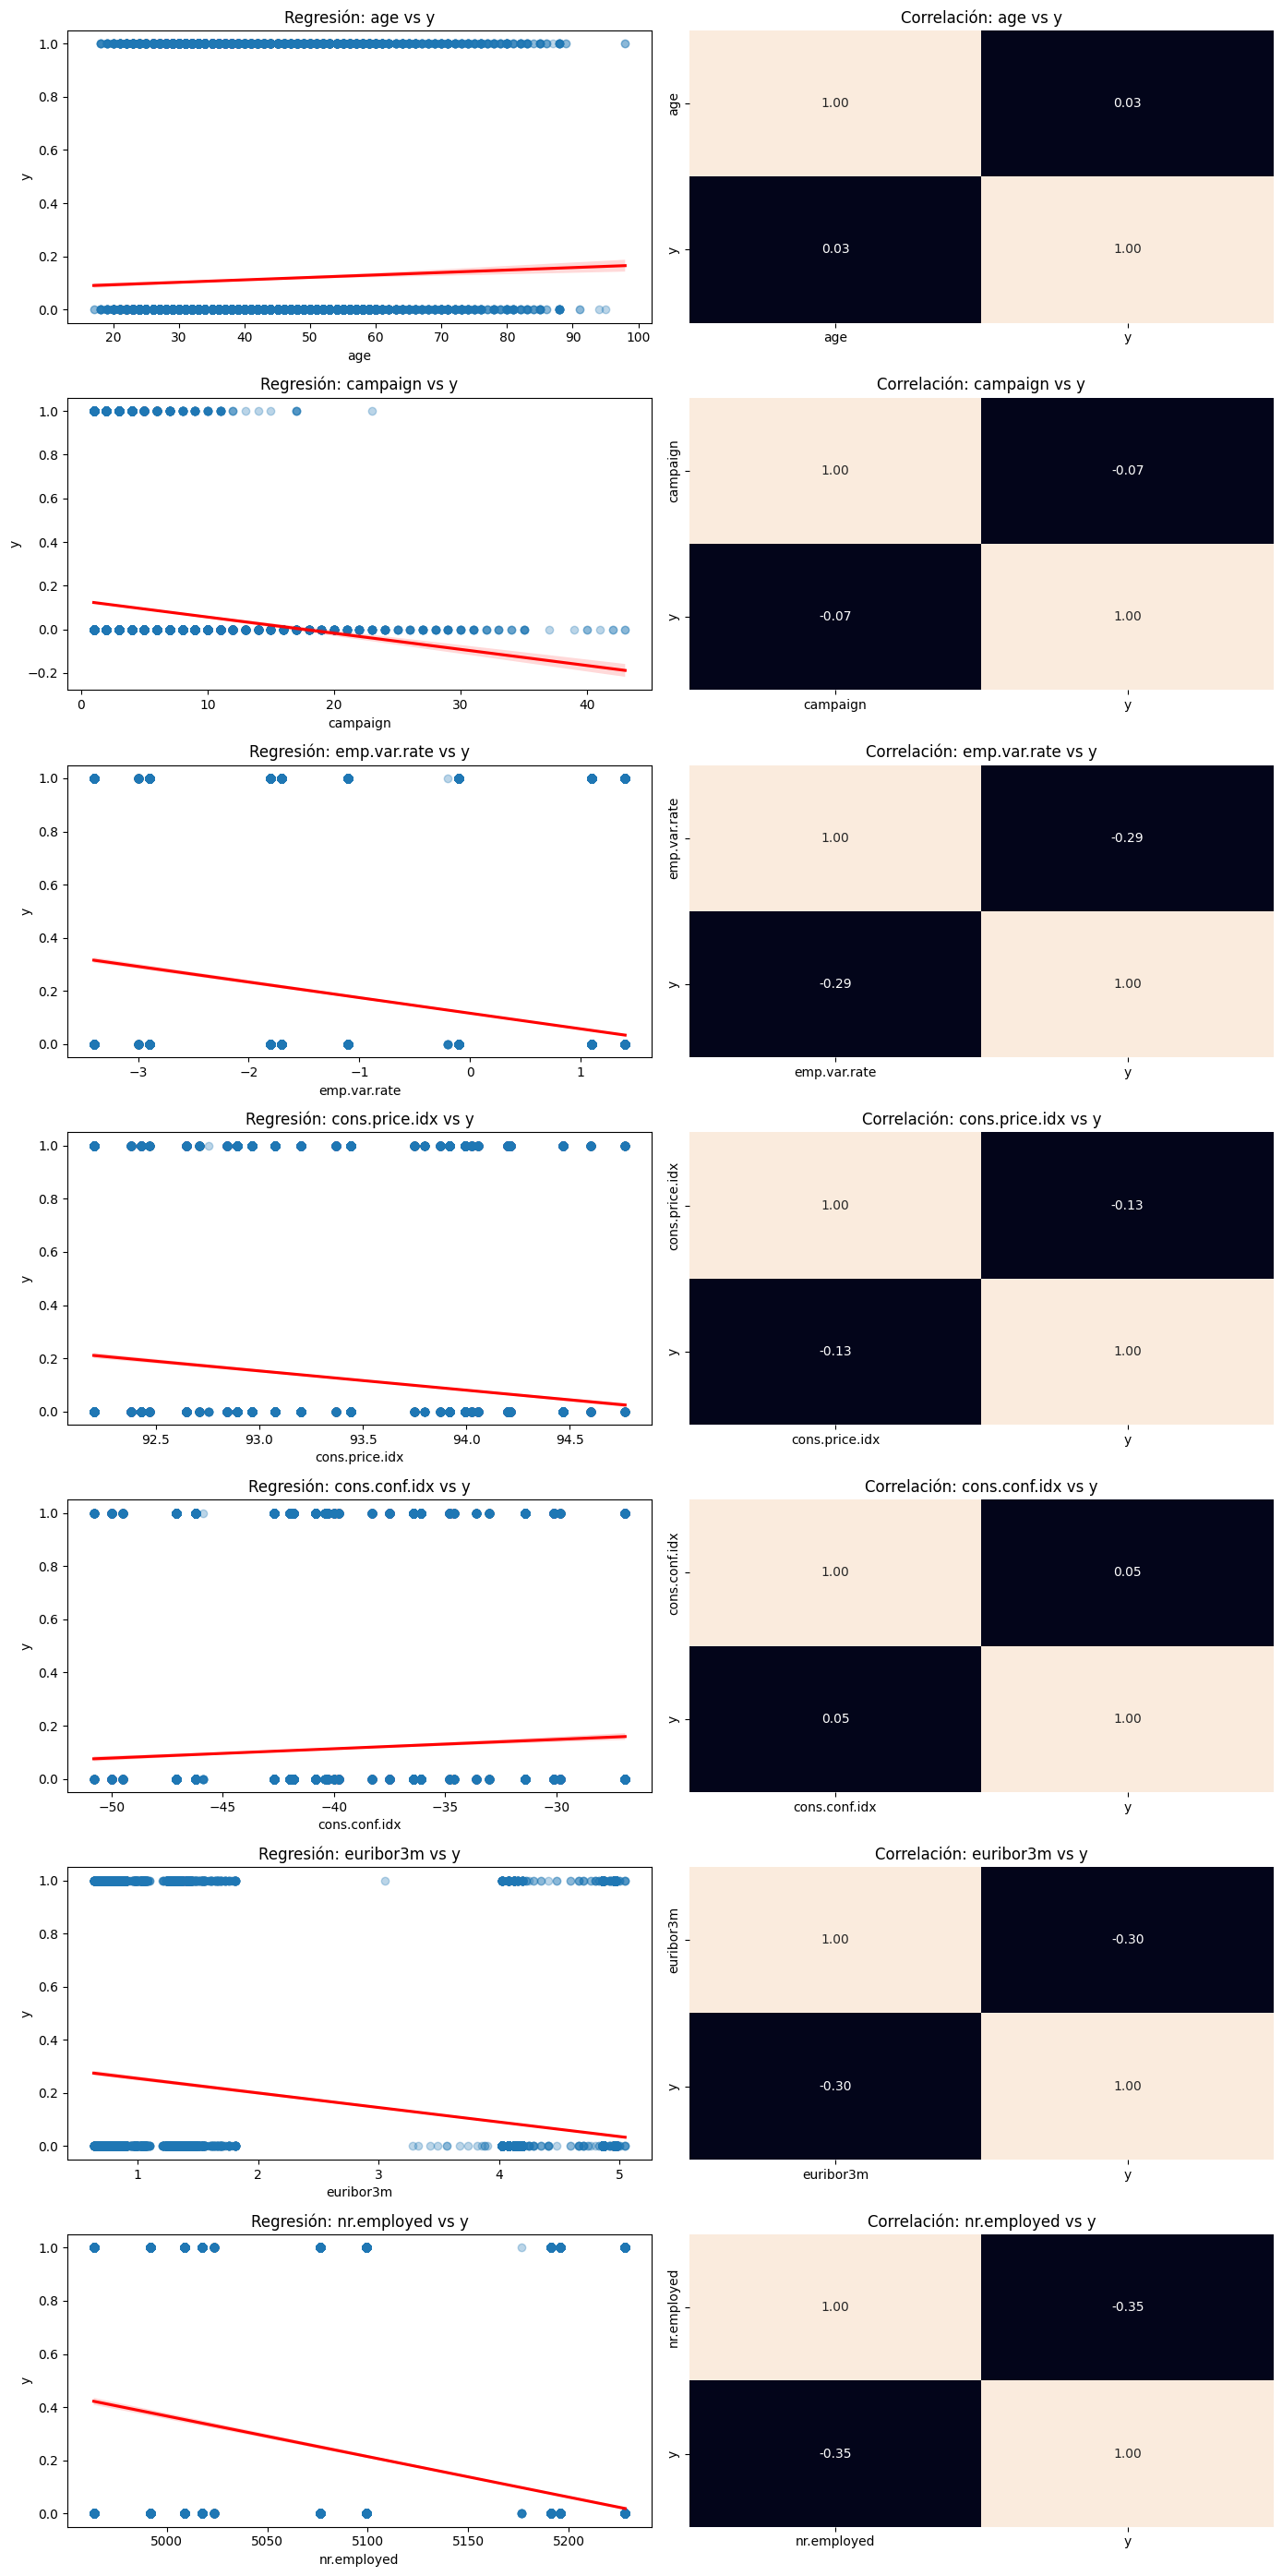

In [52]:
# - Factorización:

df = df.copy()
df["y"] = df["y"].map({"yes": 1, "no": 0})

# - Parámetros del gráfico:

fig, axis = plt.subplots(7, 2, figsize=(14, 28))

# - Distribución:

sns.regplot(ax=axis[0, 0], data=df, x="age", y="y", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
axis[0, 0].set_title("Regresión: age vs y")
sns.heatmap(df[["age", "y"]].corr(), annot=True, fmt=".2f", cbar=False, ax=axis[0, 1])
axis[0, 1].set_title("Correlación: age vs y")
sns.regplot(ax=axis[1, 0], data=df, x="campaign", y="y", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
axis[1, 0].set_title("Regresión: campaign vs y")
sns.heatmap(df[["campaign", "y"]].corr(), annot=True, fmt=".2f", cbar=False, ax=axis[1, 1])
axis[1, 1].set_title("Correlación: campaign vs y")
sns.regplot(ax=axis[2, 0], data=df, x="emp.var.rate", y="y", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
axis[2, 0].set_title("Regresión: emp.var.rate vs y")
sns.heatmap(df[["emp.var.rate", "y"]].corr(), annot=True, fmt=".2f", cbar=False, ax=axis[2, 1])
axis[2, 1].set_title("Correlación: emp.var.rate vs y")
sns.regplot(ax=axis[3, 0], data=df, x="cons.price.idx", y="y", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
axis[3, 0].set_title("Regresión: cons.price.idx vs y")
sns.heatmap(df[["cons.price.idx", "y"]].corr(), annot=True, fmt=".2f", cbar=False, ax=axis[3, 1])
axis[3, 1].set_title("Correlación: cons.price.idx vs y")
sns.regplot(ax=axis[4, 0], data=df, x="cons.conf.idx", y="y", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
axis[4, 0].set_title("Regresión: cons.conf.idx vs y")
sns.heatmap(df[["cons.conf.idx", "y"]].corr(), annot=True, fmt=".2f", cbar=False, ax=axis[4, 1])
axis[4, 1].set_title("Correlación: cons.conf.idx vs y")
sns.regplot(ax=axis[5, 0], data=df, x="euribor3m", y="y", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
axis[5, 0].set_title("Regresión: euribor3m vs y")
sns.heatmap(df[["euribor3m", "y"]].corr(), annot=True, fmt=".2f", cbar=False, ax=axis[5, 1])
axis[5, 1].set_title("Correlación: euribor3m vs y")
sns.regplot(ax=axis[6, 0], data=df, x="nr.employed", y="y", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
axis[6, 0].set_title("Regresión: nr.employed vs y")
sns.heatmap(df[["nr.employed", "y"]].corr(), annot=True, fmt=".2f", cbar=False, ax=axis[6, 1])
axis[6, 1].set_title("Correlación: nr.employed vs y")

# - Visualización:

plt.tight_layout()
plt.show()
